In [8]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt

In [9]:
# Load data
delays = []
measurements = []
filenames = os.listdir('./data/offThenOn/')

for file in filenames:
    pattern = r'([0-9]+)-([0-9]+),([0-9]+)(.*)'
        
    match = re.match(pattern, file)
    
    start = int(match.group(1))
    end = int(match.group(2))
    step = int(match.group(3))
                
    delays.append(list(range(start, end + step, step)))
    measurements.append(np.load(os.path.join('./data/offThenOn/', file)))

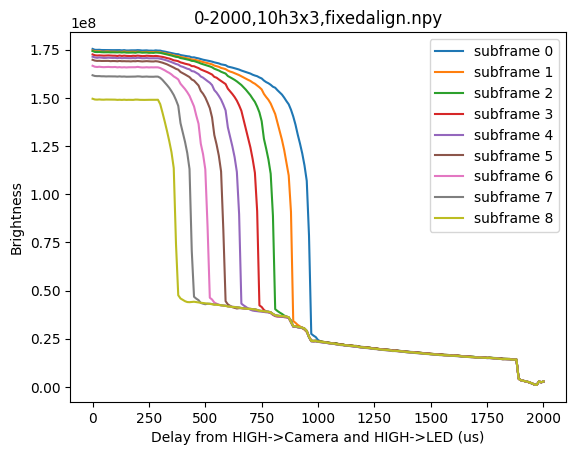

In [10]:
for filename, delay, videos in zip(filenames, delays, measurements):
    plt.figure()
    
    plt.title(f"Subframe brightness with delayed illumination\n{filename}")
    plt.ylabel("Total subframe brightness")
    plt.xlabel("Delay from HIGH->Camera and HIGH->LED (us)")
    
    num_subframes = len(videos[0])
        
    for i in range(0, num_subframes):      
        # brightness = [video[num_subframes - i - 1].sum() for video in videos]
        brightness = [video[i].sum() for video in videos]
        # brightness = np.convolve(brightness, np.array([1/5, 1/5, 1/5, 1/5, 1/5]), mode='same')
        
        plt.plot(delay, brightness, label=f'subframe {i}')
                
    plt.legend()
    plt.show()